In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-dataset-with-team-combat/team_combat.csv
/kaggle/input/pokemon-dataset-with-team-combat/pokemon.csv
/kaggle/input/pokemon-dataset-with-team-combat/pokemon_id_each_team.csv
/kaggle/input/pokemon-dataset-with-team-combat/combats.csv


# Add the necessary libraries

In [2]:
import pandas as pd # thư viện làm việc với bảng
import numpy as np # thư viện tính toán trên ma trận số 
from collections import defaultdict # dictionary có giá trị default
from collections import Counter # hàm đếm tạo thành dictionary
import matplotlib.pyplot as plt # thư viện vẽ biểu đồ matplotlib
plt.style.use('ggplot') # chỉnh theme cho biểu đồ
import seaborn as sns # thư viện vẽ biểu đồ, đẹp hơn matplotlib

In [3]:
figsize = (15, 7)

# Import data

In [4]:
df = pd.read_csv('/kaggle/input/pokemon-dataset-with-team-combat/pokemon.csv').drop('#', axis=1)
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


#### I created the `Total` columns is the sum of the rest stats of pokemon

In [5]:
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

# Basic info of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
 11  Total       800 non-null    int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


#### Remove the Pokemon that no name

In [7]:
df = df[~df.Name.isna()]

#### Fill `Type 2` with empty character

In [8]:
df['Type 2'].fillna('', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      799 non-null    object
 2   Type 2      799 non-null    object
 3   HP          799 non-null    int64 
 4   Attack      799 non-null    int64 
 5   Defense     799 non-null    int64 
 6   Sp. Atk     799 non-null    int64 
 7   Sp. Def     799 non-null    int64 
 8   Speed       799 non-null    int64 
 9   Generation  799 non-null    int64 
 10  Legendary   799 non-null    bool  
 11  Total       799 non-null    int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 75.7+ KB


In [10]:
df[df['Name'].str.contains('Mega')]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
7,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
12,Mega Blastoise,Water,,79,103,120,135,115,78,1,False,630
19,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495
23,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False,579
71,Mega Alakazam,Psychic,,55,50,65,175,95,150,1,False,590
87,Mega Slowbro,Water,Psychic,95,75,180,130,80,30,1,False,590
102,Mega Gengar,Ghost,Poison,60,65,80,170,95,130,1,False,600
124,Mega Kangaskhan,Normal,,105,125,100,60,100,100,1,False,590


In [11]:
df['Name'] = df['Name'].str.replace('.*(?=Mega)', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
df[df['Name'].str.contains('Mega')]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
7,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
12,Mega Blastoise,Water,,79,103,120,135,115,78,1,False,630
19,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495
23,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False,579
71,Mega Alakazam,Psychic,,55,50,65,175,95,150,1,False,590
87,Mega Slowbro,Water,Psychic,95,75,180,130,80,30,1,False,590
102,Mega Gengar,Ghost,Poison,60,65,80,170,95,130,1,False,600
124,Mega Kangaskhan,Normal,,105,125,100,60,100,100,1,False,590


# Centroid values
### Mode, Median and Mean

![mmm](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/mmm.png)

In [13]:
df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,69.264080,78.968711,73.859825,72.836045,71.904881,68.244055,3.326658,435.077597
std,25.550218,32.464637,31.199180,32.739641,27.846265,29.063266,1.660292,120.036112
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,180.000000
25%,50.000000,55.000000,50.000000,49.500000,50.000000,45.000000,2.000000,330.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.000000,450.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.000000,515.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.000000,780.000000


# Boxplot
![boxplot](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/boxplot.png)

### Observe the boxplot of the attributes of the Pokemon

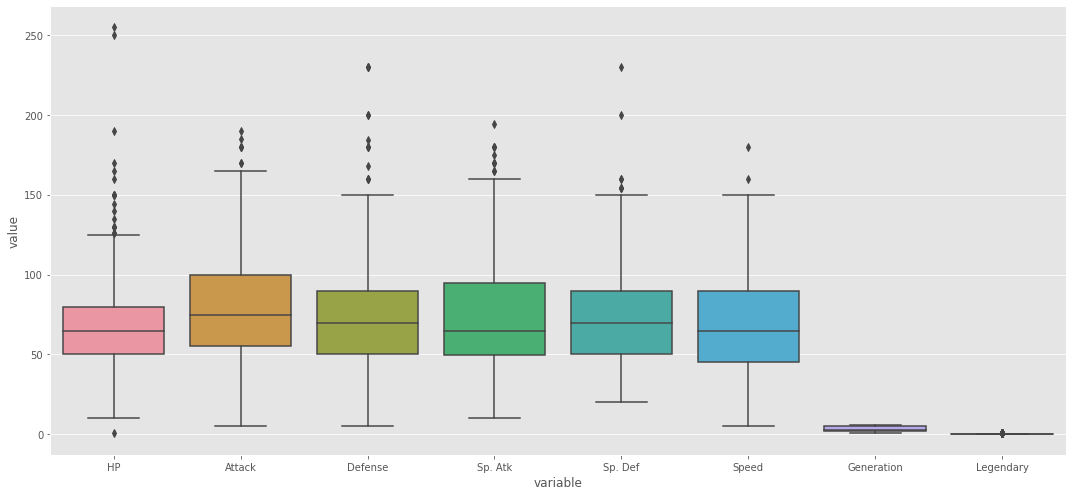

In [14]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(data=df.iloc[:, 3:-1].melt(), x='variable', y='value')
plt.tight_layout()
plt.show()

#### Question:
- Are all outliers `Legendary` pokemon?

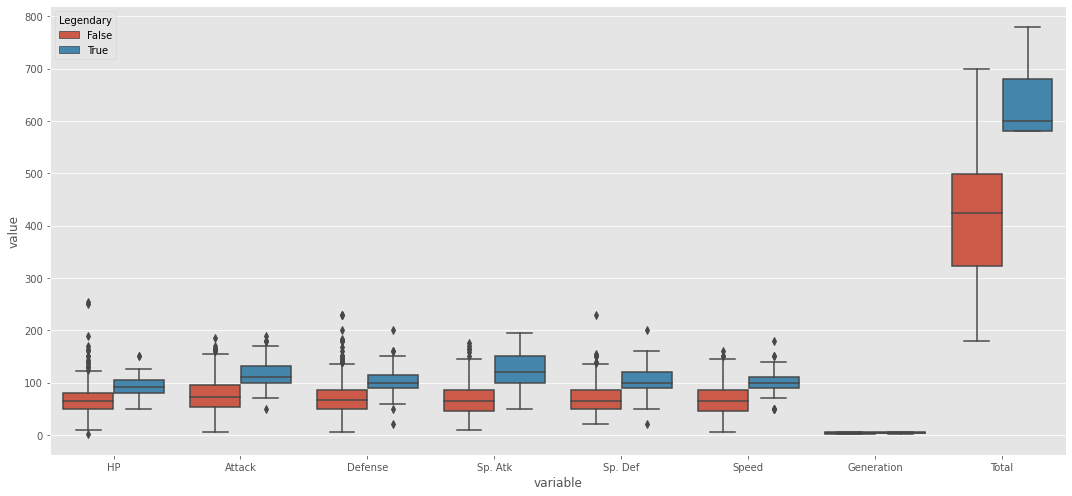

In [15]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(data=df.iloc[:, 3:].melt(id_vars='Legendary'), x='variable', y='value', hue='Legendary')
plt.tight_layout()
plt.show()

# Histogram

![histogram](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/hist.jpg)

#### Question:
- How `HP` distribution?

In [16]:
def plot(data, x, is_hist=True, **kwargs):
    plt.figure(figsize=figsize)
    if is_hist:
        sns.histplot(data=data, x=x, **kwargs)
        plt.axvline(data[x].mean(), ls='-.', c='blue', lw=4, label='mean')
        plt.axvline(data[x].median(), ls='-.', c='red', lw=4, label='median')
    else:
        sns.boxplot(data=data, x=x, **kwargs)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

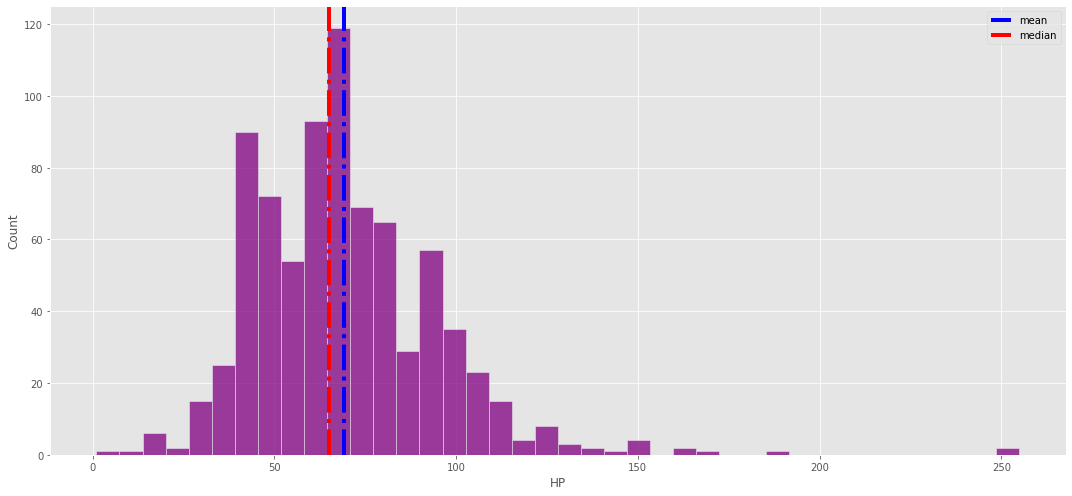

In [17]:
plot(df, 'HP', color='purple')

- Distribution of `Attack`

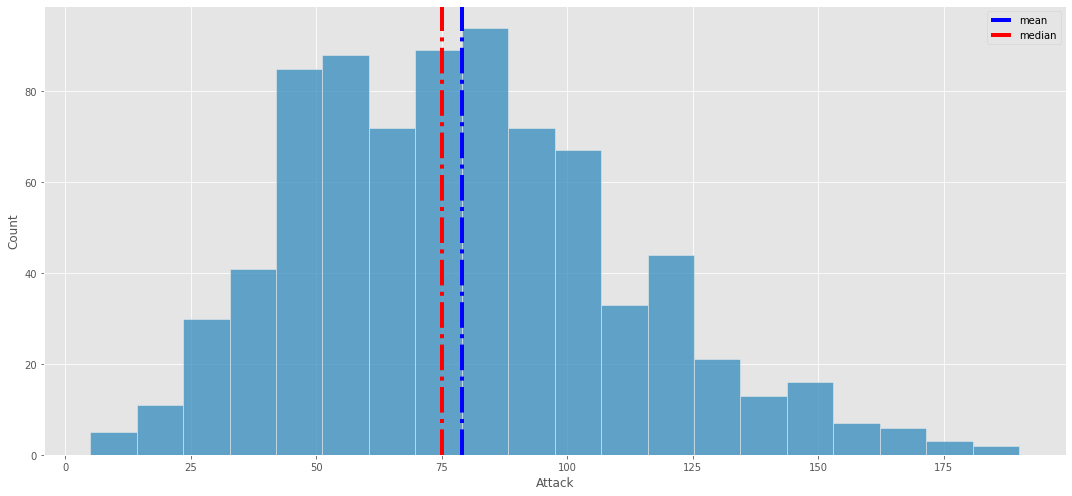

In [18]:
plot(df, 'Attack')

# Bar chart and Histogram

#### Question:
- Why histogram instead of barchart?

![bar vs hist](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/hist_vs_bar.png)

# Bar chart

#### Question:
- What is the number of each type of pokemon?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Type 1,Flying,Fairy,Ice,Fighting,Steel,Poison,Dark,Ghost,Dragon,Ground,Electric,Rock,Fire,Psychic,Bug,Grass,Normal,Water
Name,4,17,24,26,27,28,31,32,32,32,44,44,52,57,69,70,98,112


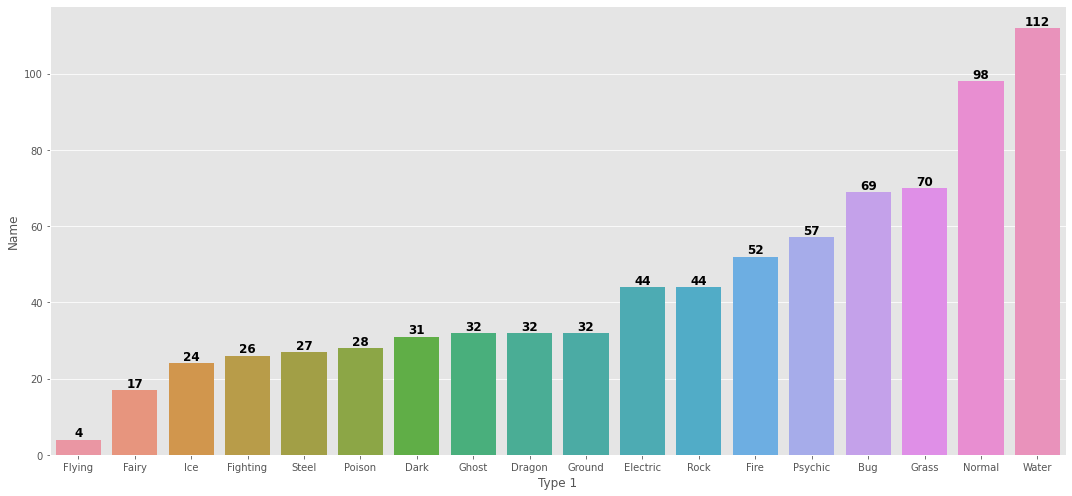

In [19]:
data = df.groupby('Type 1')['Name'].count().reset_index().sort_values(by='Name').reset_index(drop=True)
display(data.T)

fig, ax = plt.subplots(figsize=figsize)
g = sns.barplot(data=data, x='Type 1', y='Name', ax=ax)
for p in g.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        fontsize=12, va='bottom', ha='center', fontweight='bold'
    )
plt.tight_layout()
plt.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Type 2,Bug,Normal,Electric,Fire,Ghost,Rock,Ice,Water,Dragon,Dark,Steel,Fairy,Grass,Fighting,Psychic,Poison,Ground,Flying,
Name,3,4,6,12,14,14,14,14,18,20,22,23,25,26,33,34,35,97,385


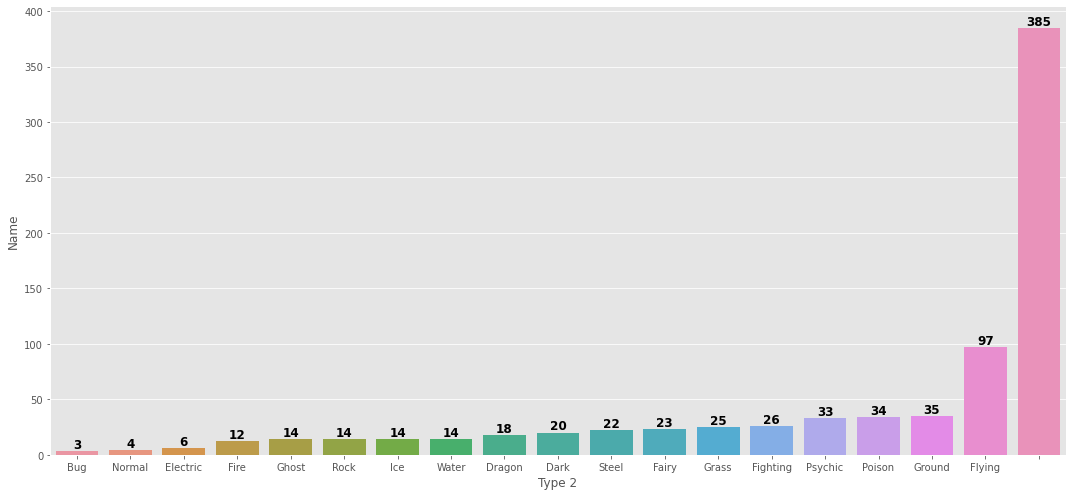

In [20]:
data = df.groupby('Type 2')['Name'].count().reset_index().sort_values(by='Name').reset_index(drop=True)
display(data.T)
fig, ax = plt.subplots(figsize=figsize)
g = sns.barplot(data=data, x='Type 2', y='Name', ax=ax)
for p in g.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        fontsize=12, va='bottom', ha='center', fontweight='bold'
    )
plt.tight_layout()
plt.show()

# Pie chart

![pie](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/pie.jpg)

### Using pie chart inappropriately

In [21]:
pie_shape = (15, 6)

#### Question:
- What is the ratio of the systems in Pokemon?

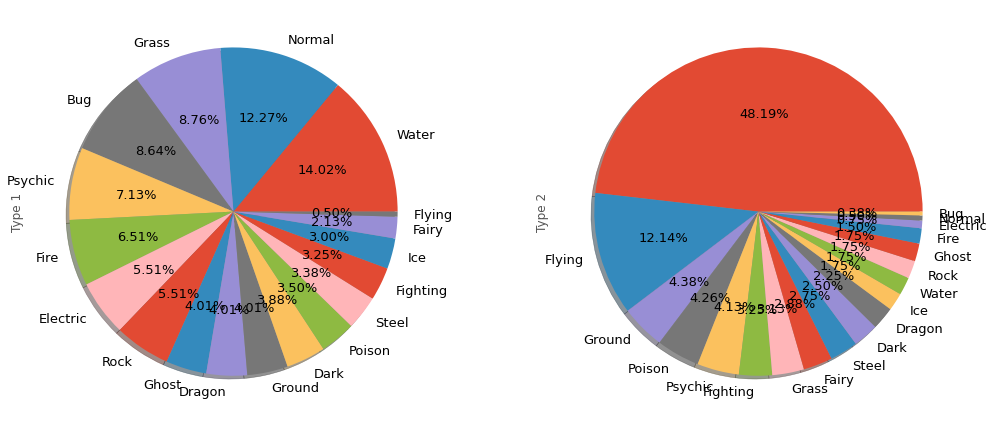

In [22]:
fig, ax = plt.subplots(1, 2, figsize=pie_shape)
df['Type 1'].value_counts().plot(kind='pie', autopct='%.2f%%', fontsize=13, shadow=True, ax=ax[0])
df['Type 2'].value_counts().plot(kind='pie', autopct='%.2f%%', fontsize=13, shadow=True, ax=ax[1])
plt.tight_layout()
plt.show()

## $\rightarrow$ Improper use of pie chart.

### Fix: Use bar chart or reduce the number of properties.

## Use the right pie chart

**$\rightarrow$ Few attributes**

#### Question:
- Number of pokemon of generation?

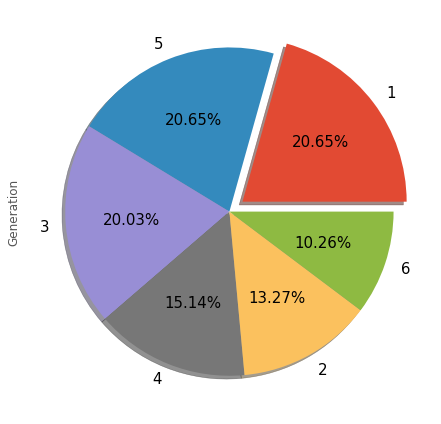

In [23]:
plt.figure(figsize=pie_shape)
df['Generation'].value_counts().plot(kind='pie', autopct='%.2f%%', fontsize=15, shadow=True, explode=[0.1, 0, 0, 0, 0, 0])
plt.tight_layout()
plt.show()

# Scatter

![scatter](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/scatter.gif)

#### Question:
- Does `Attack` and `Defense` has correlation?

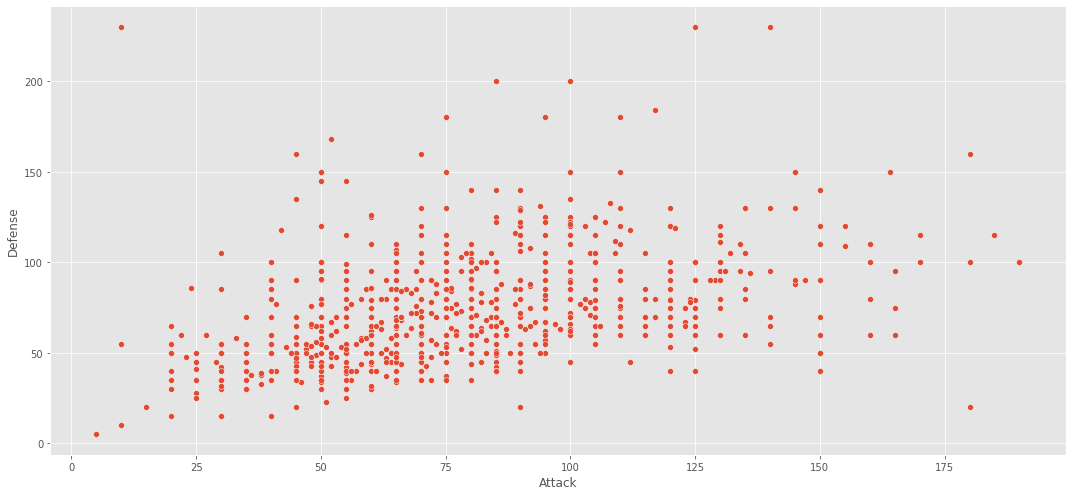

In [24]:
plt.figure(figsize=figsize)
sns.scatterplot(data=df, x='Attack', y='Defense')
plt.tight_layout()
plt.show()

# Correlation - correlation between two features

![corr_gif](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/pearson.gif)

### $Correlation \in [-1, 1]$

![corr](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/corr_dir.png)

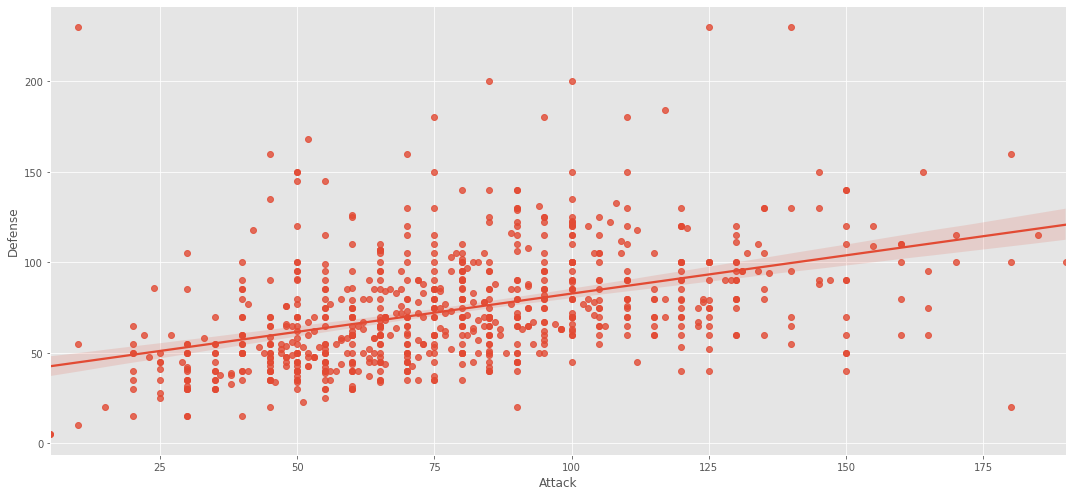

In [25]:
plt.figure(figsize=figsize)
sns.regplot(data=df, x='Attack', y='Defense')
plt.tight_layout()
plt.show()

In [26]:
x = df['Attack']
y = df['Defense']
x.corr(y)

0.4393635297948296

![corr](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/corr.png)

# Heatmap

In [27]:
df.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
HP,1.000000,0.422731,0.239563,0.362339,0.378711,0.176241,0.058463,0.273577,0.618804
Attack,0.422731,1.000000,0.439364,0.396953,0.264165,0.380671,0.052942,0.345864,0.736353
Defense,0.239563,0.439364,1.000000,0.223380,0.510773,0.015748,0.041697,0.246256,0.612966
Sp. Atk,0.362339,0.396953,0.223380,1.000000,0.506138,0.473766,0.035797,0.448829,0.747416
Sp. Def,0.378711,0.264165,0.510773,0.506138,1.000000,0.259350,0.028401,0.363933,0.717638
Speed,0.176241,0.380671,0.015748,0.473766,0.259350,1.000000,-0.021547,0.327249,0.576067
Generation,0.058463,0.052942,0.041697,0.035797,0.028401,-0.021547,1.000000,0.079374,0.048735
Legendary,0.273577,0.345864,0.246256,0.448829,0.363933,0.327249,0.079374,1.000000,0.501857
Total,0.618804,0.736353,0.612966,0.747416,0.717638,0.576067,0.048735,0.501857,1.000000


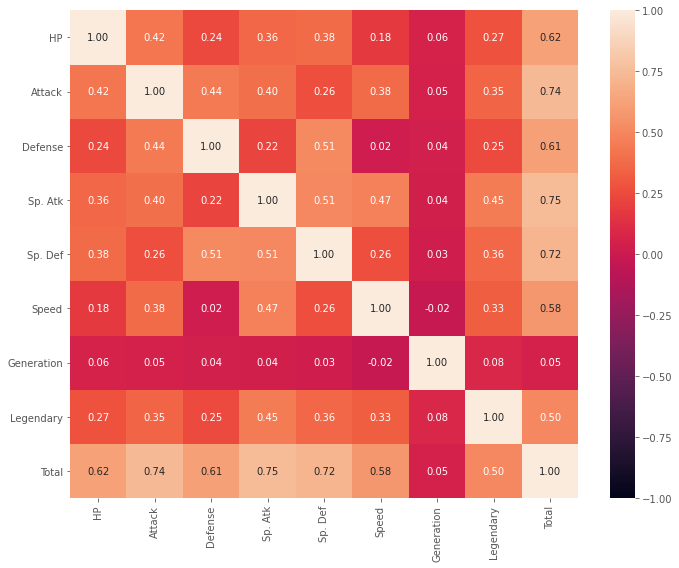

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

# Lineplot

#### Question:
- How many Pokemon per generation?

In [29]:
data = df['Generation'].value_counts().reset_index().rename(columns={'Generation': 'count', 'index': 'Generation'})
data.sort_values(by='Generation', inplace=True)
data

,Generation,count
0,1,165
4,2,106
2,3,160
3,4,121
1,5,165
5,6,82


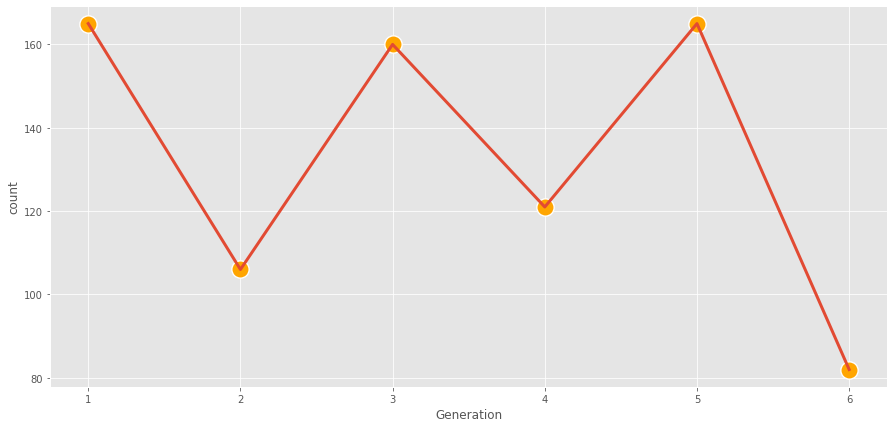

In [30]:
plt.figure(figsize=figsize)
sns.lineplot(data=data, x='Generation', y='count', lw=3)
sns.scatterplot(data=data, x='Generation', y='count', s=300, color='orange')
plt.show()

# Barchart Race

In [31]:
from IPython.display import HTML
HTML('<iframe width="1000" height="500" src="https://www.youtube.com/embed/HY9D42M_0d8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Explore Data Analysis

#### Question:
- How to see the number of Pokemon with 1 or 2 types like?

In [32]:
corr_dict = defaultdict(dict)
for t1 in set(df['Type 1'].unique()):
    for t2 in set(df['Type 2'].unique()):
        corr_dict[t1][t2] = df[(df['Type 1'] == t1) & (df['Type 2'] == t2)]['Name'].count()
data = pd.DataFrame(corr_dict)

mask = np.zeros_like(data)
mask[data == 0] = True

In [33]:
data

,Rock,Electric,Fighting,Ghost,Steel,Fairy,Dark,Fire,Flying,Grass,Normal,Poison,Water,Psychic,Dragon,Bug,Ice,Ground
,9,27,19,10,5,15,10,28,2,33,61,15,59,38,11,17,13,13
Flying,4,5,1,2,1,2,5,6,0,5,24,3,7,6,6,14,2,4
Poison,0,0,0,4,0,0,0,0,0,15,0,0,3,0,0,12,0,0
Dragon,2,1,0,2,1,0,3,1,2,1,0,1,2,0,0,0,0,2
Electric,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,0,1
Ghost,0,1,0,0,4,0,2,0,0,0,0,0,2,1,0,1,1,2
Fairy,3,1,0,0,3,0,0,0,0,2,5,0,2,6,1,0,0,0
Fire,0,1,0,3,0,0,3,0,0,0,0,0,0,1,1,2,0,1
Grass,2,1,0,10,0,0,0,0,0,0,2,0,3,1,0,6,0,0
Water,6,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,3,0


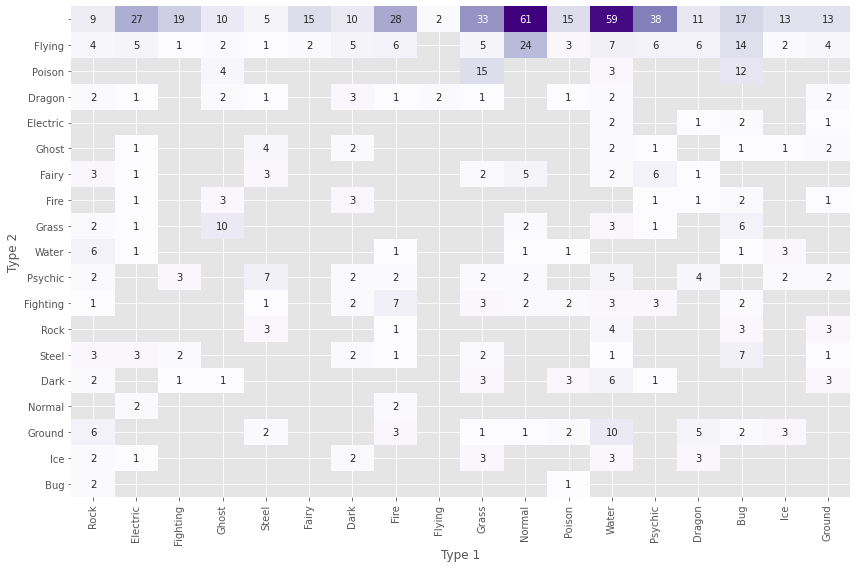

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=data, annot=True, fmt='d', mask=mask, cmap='Purples', cbar=False)
plt.xlabel('Type 1', fontsize=12)
plt.ylabel('Type 2', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

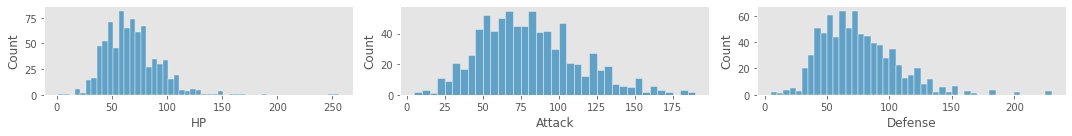

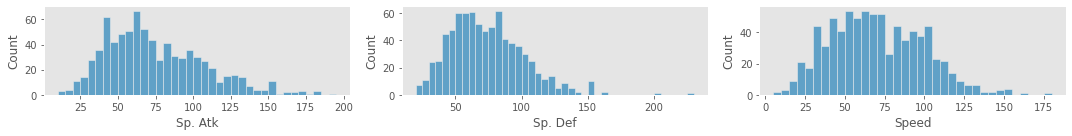

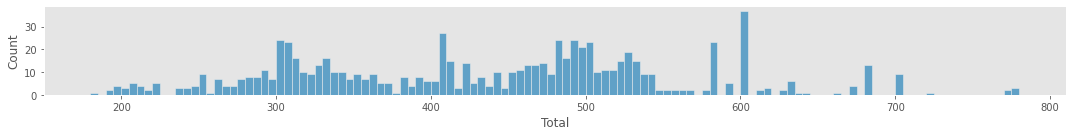

In [35]:
hist_figsize = (15, 2)
binwidth = 5
f, ax = plt.subplots(1, 3, sharey=False, figsize=hist_figsize)
sns.histplot(data=df['HP'], ax=ax[0], binwidth=binwidth)
sns.histplot(data=df['Attack'], ax=ax[1], binwidth=binwidth)
sns.histplot(data=df['Defense'], ax=ax[2], binwidth=binwidth)
for i in range(3):
    ax[i].grid(False)
f.tight_layout()
    
f, ax = plt.subplots(1, 3, sharey=False, figsize=hist_figsize)
sns.histplot(data=df['Sp. Atk'], ax=ax[0], binwidth=binwidth)
sns.histplot(data=df['Sp. Def'], ax=ax[1], binwidth=binwidth)
sns.histplot(data=df['Speed'], ax=ax[2], binwidth=binwidth)
for i in range(3):
    ax[i].grid(False)
f.tight_layout()
    
f, ax = plt.subplots(figsize=hist_figsize)
sns.histplot(data=df['Total'], ax=ax, binwidth=binwidth)
ax.grid(False)
f.tight_layout()
plt.show()

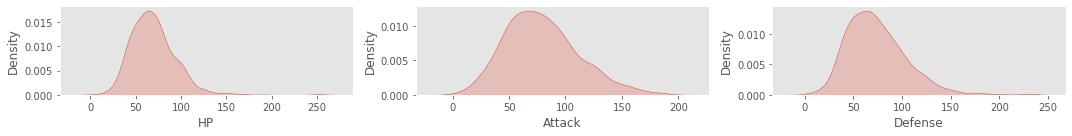

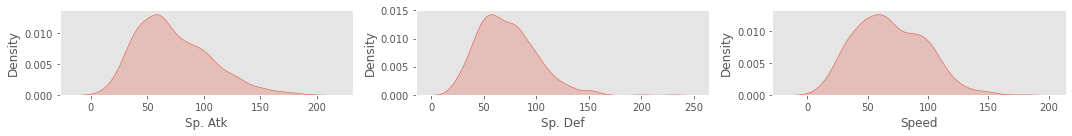

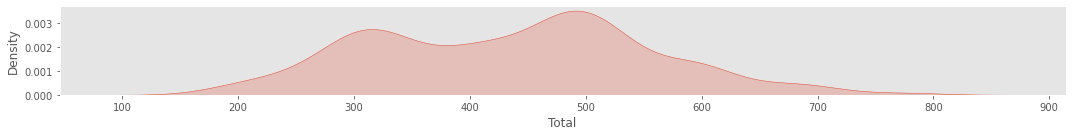

In [36]:
hist_figsize = (15, 2)
binwidth = 5

f, ax = plt.subplots(1, 3, sharey=False, figsize=hist_figsize)
sns.kdeplot(df['HP'], ax=ax[0], fill=True)
sns.kdeplot(data=df['Attack'], ax=ax[1], fill=True)
sns.kdeplot(data=df['Defense'], ax=ax[2], fill=True)
f.tight_layout()
for i in range(3):
    ax[i].grid(False)
    
f, ax = plt.subplots(1, 3, sharey=False, figsize=hist_figsize)
sns.kdeplot(data=df['Sp. Atk'], ax=ax[0], fill=True)
sns.kdeplot(data=df['Sp. Def'], ax=ax[1], fill=True)
sns.kdeplot(data=df['Speed'], ax=ax[2], fill=True)
f.tight_layout()

for i in range(3):
    ax[i].grid(False)
f, ax = plt.subplots(figsize=hist_figsize)
sns.kdeplot(data=df['Total'], ax=ax, fill=True)
ax.grid(False)
f.tight_layout()

plt.show()

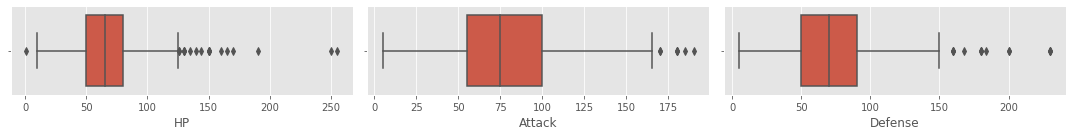

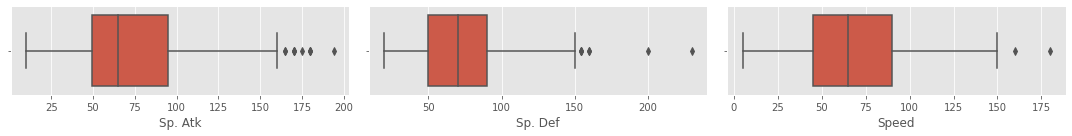

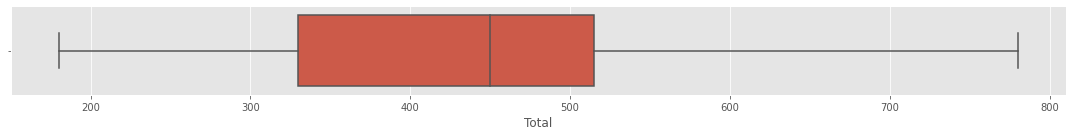

In [37]:
hist_figsize = (15, 2)
binwidth = 5
f, ax = plt.subplots(1, 3, sharey=True, figsize=hist_figsize)
sns.boxplot(data=df, ax=ax[0], x='HP')
sns.boxplot(data=df, ax=ax[1], x='Attack')
sns.boxplot(data=df, ax=ax[2], x='Defense')
f.tight_layout()

f, ax = plt.subplots(1, 3, sharey=True, figsize=hist_figsize)
sns.boxplot(data=df, ax=ax[0], x='Sp. Atk')
sns.boxplot(data=df, ax=ax[1], x='Sp. Def')
sns.boxplot(data=df, ax=ax[2], x='Speed')
f.tight_layout()

f, ax = plt.subplots(figsize=hist_figsize)
sns.boxplot(data=df, ax=ax, x='Total')
f.tight_layout()

plt.show()

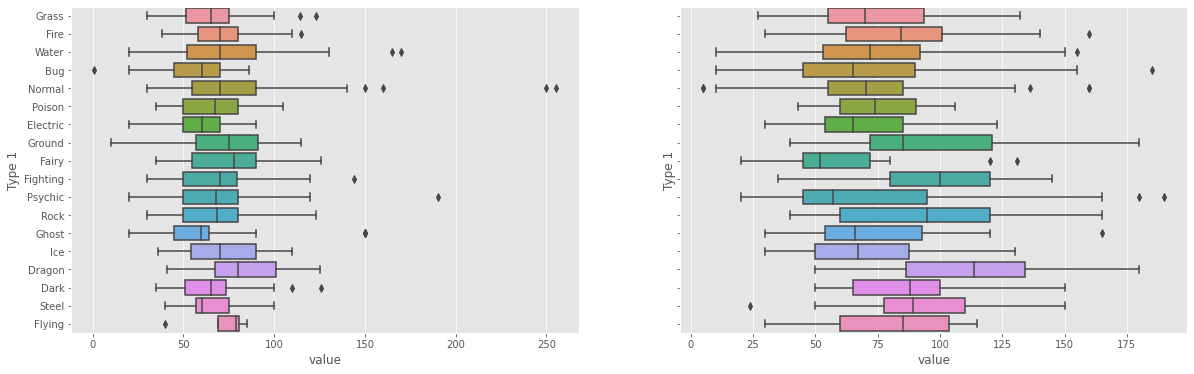

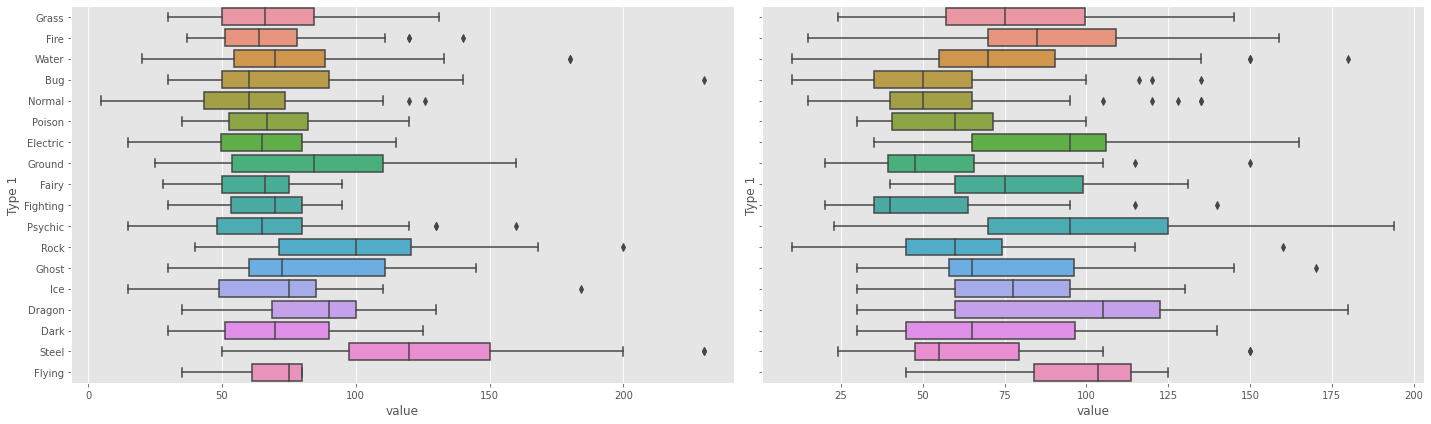

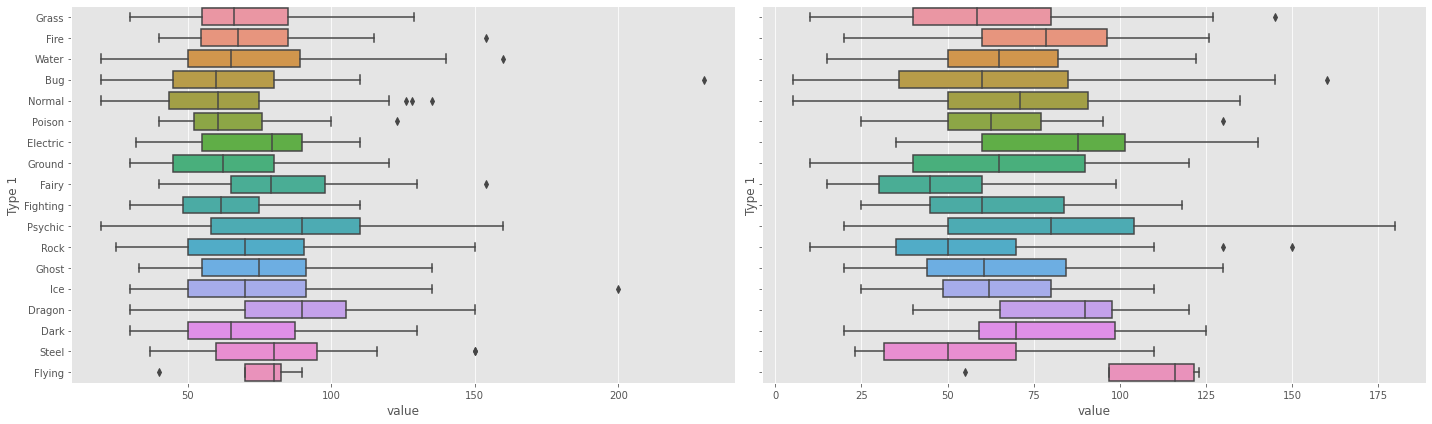

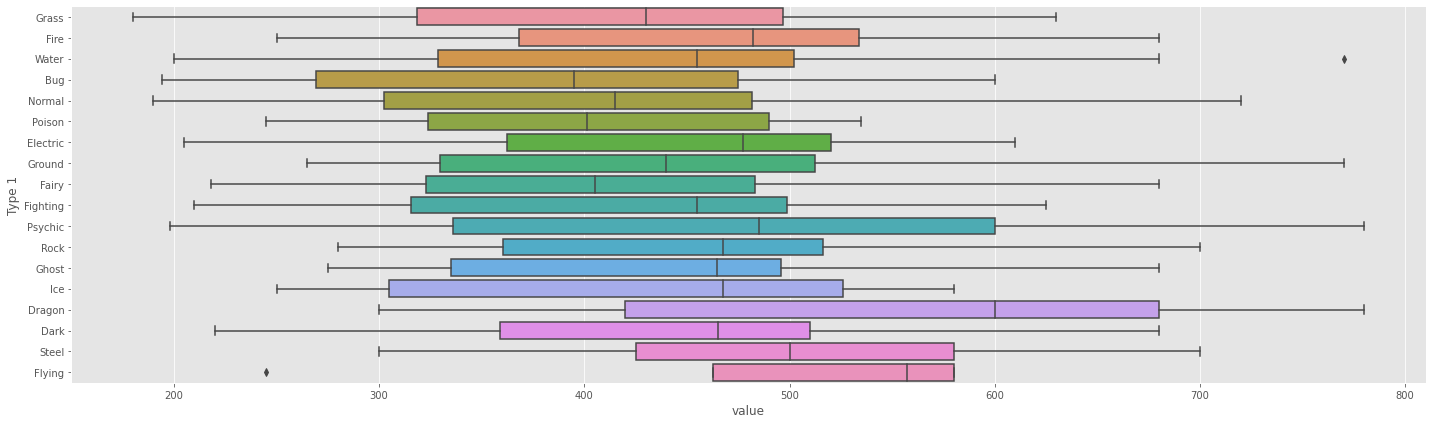

In [38]:
boxplot_figsize = (20, 6)
fig, ax = plt.subplots(1, 2, figsize=boxplot_figsize, sharey=True)
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['HP']), y='Type 1', x='value', ax=ax[0])
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Attack']), y='Type 1', x='value', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=boxplot_figsize, sharey=True)
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Defense']), y='Type 1', x='value', ax=ax[0])
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Sp. Atk']), y='Type 1', x='value', ax=ax[1])
fig.tight_layout()

fig, ax = plt.subplots(1, 2, figsize=boxplot_figsize, sharey=True)
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Sp. Def']), y='Type 1', x='value', ax=ax[0])
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Speed']), y='Type 1', x='value', ax=ax[1])
fig.tight_layout()

fig, ax = plt.subplots(figsize=boxplot_figsize)
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Total']), y='Type 1', x='value', ax=ax)
fig.tight_layout()

plt.show()

In [39]:
def plot_bar(df, name, title):
    data = df.sort_values(by=name, ascending=False).head(10)
    fig, ax = plt.subplots(figsize=(6, 6))
    g = sns.barplot(data=data, y='Name', x=name)
    for p in g.patches:
        ax.annotate(
            format(p.get_width(), '.0f'),
            (p.get_height() + p.get_width(), p.get_y()),
            ha='left', va='top'
        )
    plt.title(title)
    plt.show()
    return list(data['Name'].values)

# Top 10 Pokemon of stats
### Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

In [40]:
top_of_tops = []

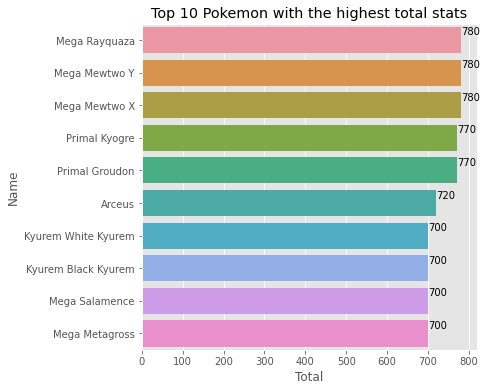

In [41]:
top_of_tops += plot_bar(df, name='Total', title='Top 10 Pokemon with the highest total stats')

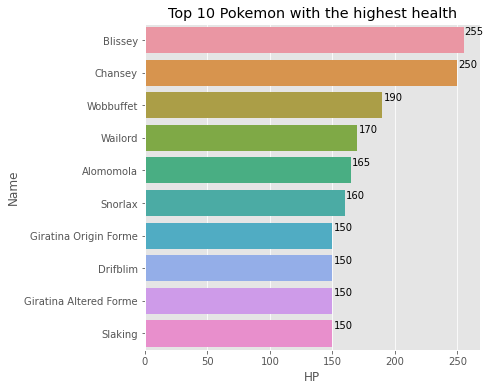

In [42]:
top_of_tops += plot_bar(df, name='HP', title='Top 10 Pokemon with the highest health')

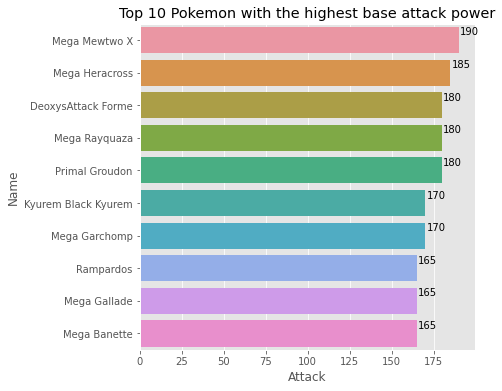

In [43]:
top_of_tops += plot_bar(df, name='Attack', title='Top 10 Pokemon with the highest base attack power')

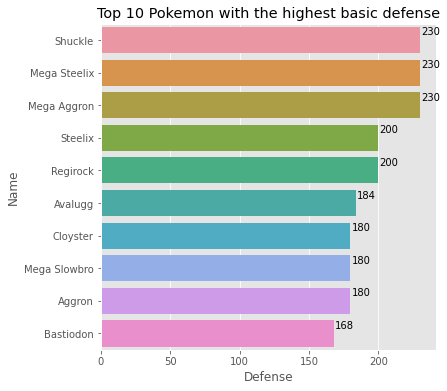

In [44]:
top_of_tops += plot_bar(df, name='Defense', title='Top 10 Pokemon with the highest basic defense')

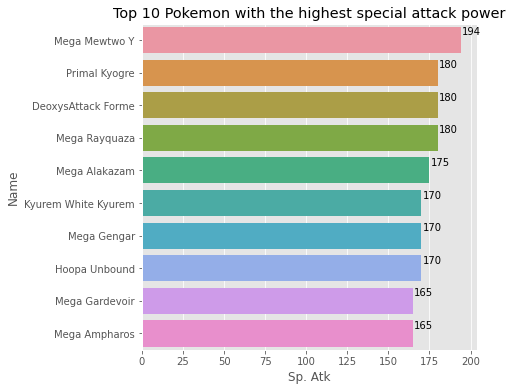

In [45]:
top_of_tops += plot_bar(df, name='Sp. Atk', title='Top 10 Pokemon with the highest special attack power')

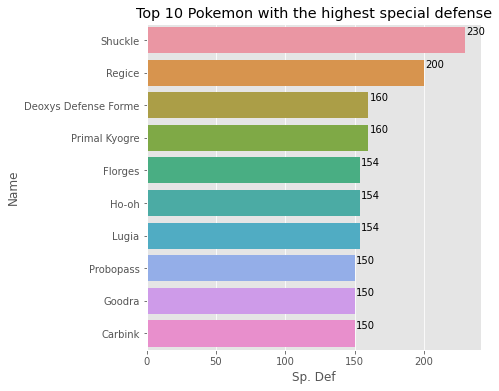

In [46]:
top_of_tops += plot_bar(df, name='Sp. Def', title='Top 10 Pokemon with the highest special defense')

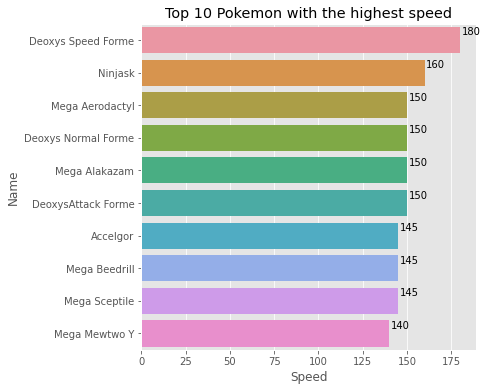

In [47]:
top_of_tops += plot_bar(df, name='Speed', title='Top 10 Pokemon with the highest speed')

In [48]:
top_of_top_df = pd.DataFrame(Counter(top_of_tops).items(), columns=['Name', 'Count']).sort_values(by='Count', ascending=False)
top_of_top_df.head(10)

,Name,Count
0,Mega Rayquaza,3
3,Primal Kyogre,3
21,DeoxysAttack Forme,3
1,Mega Mewtwo Y,3
4,Primal Groudon,2
6,Kyurem White Kyurem,2
7,Kyurem Black Kyurem,2
36,Mega Alakazam,2
26,Shuckle,2
2,Mega Mewtwo X,2


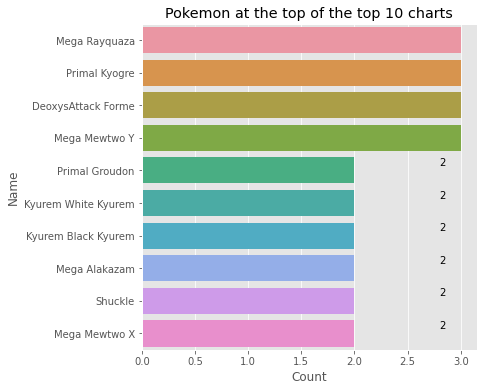

['Mega Rayquaza',
 'Primal Kyogre',
 'DeoxysAttack Forme',
 'Mega Mewtwo Y',
 'Primal Groudon',
 'Kyurem White Kyurem',
 'Kyurem Black Kyurem',
 'Mega Alakazam',
 'Shuckle',
 'Mega Mewtwo X']

In [49]:
plot_bar(top_of_top_df.head(10), name='Count', title='Pokemon at the top of the top 10 charts')

In [50]:
def plot_radar(name, fig, axis=111):
    index = df[df['Name'] == name].index[0]
    labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
    stats=df.loc[index, labels].values

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    labels = np.concatenate((labels, [labels[0]]))
    
    ax = fig.add_subplot(axis, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=12, fontweight='bold')
    ax.set_title(name)
    ax.grid(True)
    
    return fig

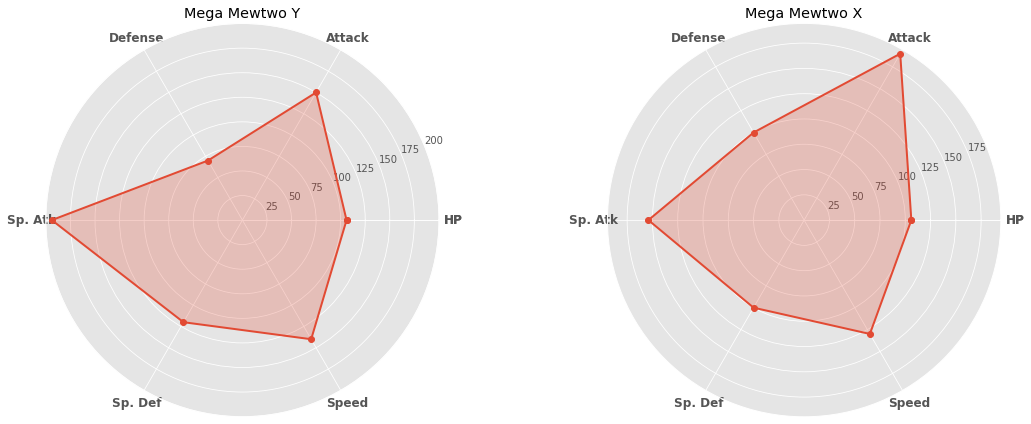

In [51]:
fig = plt.figure(figsize=(16, 6))
fig = plot_radar('Mega Mewtwo Y', fig, axis=121)
fig = plot_radar('Mega Mewtwo X', fig, axis=122)
fig.tight_layout()
plt.show()

### We have the story:

You are assigned a task to help the boy Satoshi, a 10-year-old boy, on his way to becoming a professional Pokemon trainer.

![satoshi](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/satoshi.png)

And the professor allowed the boy to choose one of the 3 pokemon below, respectively Bulbasaur, Charmander, Squirtle

![3start](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/3start.jpg)

Satoshi is wondering about one of these 3 Pokemon, looking for advice from you, a professional data scientist. With the knowledge of data exploration so far, if it were you, which Pokemon would you choose from the 3 Pokemon above so that Satoshi could firmly step on the way to becoming a professional Pokemon Trainer.

# Bulbasaur

![saur](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/evolution_saur.png)

In [52]:
def plot_series_radar(names):
    labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))
    labels = np.concatenate((labels, [labels[0]]))

    indexes = []
    stats = []
    for name in names:
        indexes.append(df[df['Name'] == name].index[0])
        stats.append(list(df.loc[indexes[-1], labels].values))

    stats = [stat + stat[0] for stat in stats]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12), subplot_kw=dict(polar=True))

    for stat, name in zip(stats, names):
        ax.plot(angles, stat, 'o-', linewidth=2, label=name)
        ax.fill(angles, stat, alpha=0.25)

    ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=12, fontweight='bold')
    # ax.set_title(name)
    ax.grid(True)
    plt.legend(loc='center')
    ax.set_title('Radar chart of %s' % (', '.join(names)))
    plt.show()

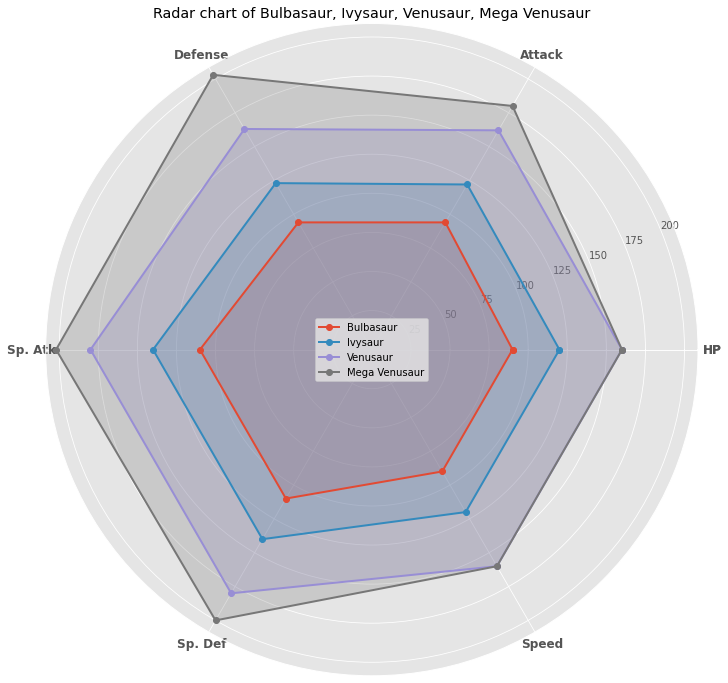

In [53]:
bulbasaur_names = ['Bulbasaur', 'Ivysaur', 'Venusaur', 'Mega Venusaur']
plot_series_radar(bulbasaur_names)

# Charmander

![chamander](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/chamander.jpg)

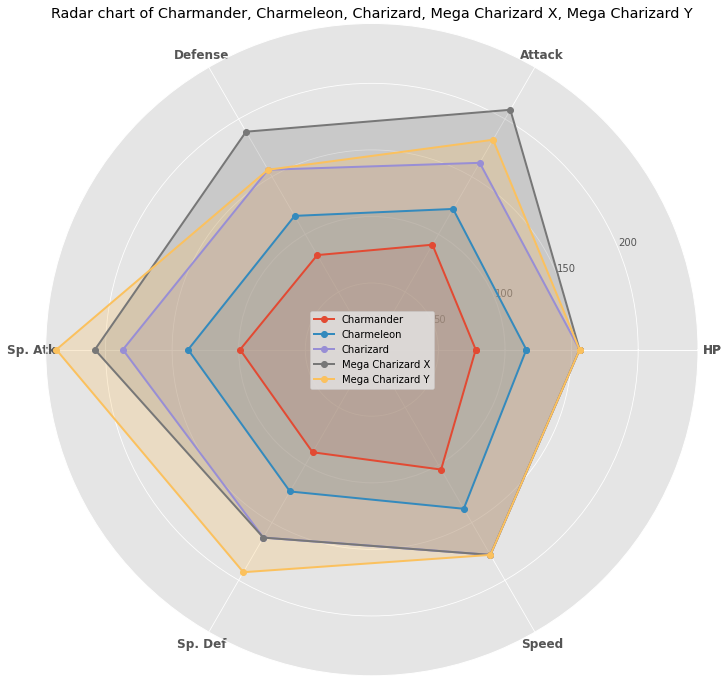

In [54]:
charmander_names = ['Charmander', 'Charmeleon', 'Charizard', 'Mega Charizard X', 'Mega Charizard Y']
plot_series_radar(charmander_names)

# Squirtle
![squirtle](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/squirtle.jpg)

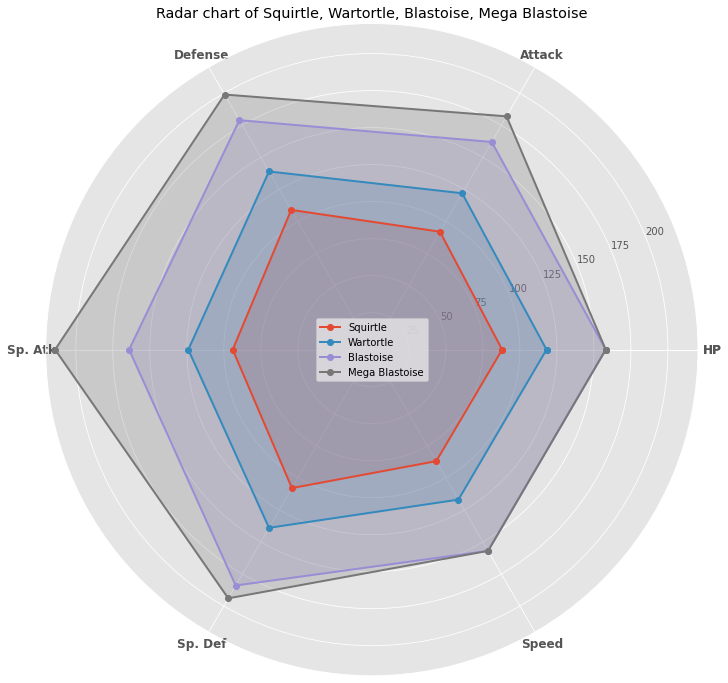

In [55]:
squirtle_names = ['Squirtle', 'Wartortle', 'Blastoise', 'Mega Blastoise']
plot_series_radar(squirtle_names)

## With the last and final analysis, Satoshi chose...

![satoshi_pikachu](https://raw.githubusercontent.com/tuanio/pbl_ds_2021/main/week%203/assets/satoshi_pikachu.png)